# Supervised vs Unsupervised Learning

This notebook demonstrates the difference between **supervised** and
**unsupervised** learning using simple, visual examples.

We use the same underlying data and compare:
- learning with labels (supervised learning)
- learning without labels (unsupervised learning)

The goal is to build intuition for how supervision changes what a model can learn.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


## Data Description

We generate synthetic data where the target variable `y` depends linearly on
the input feature `X`, with added noise.

This setup mimics real-world data where:
- a clear relationship exists
- observations are noisy
- exact rules are difficult to write


In [2]:
np.random.seed(42)

# Input feature
X = np.linspace(0, 10, 50).reshape(-1, 1)

# Target with noise (for supervised learning)
y = 3 * X.squeeze() + np.random.randn(50) * 2


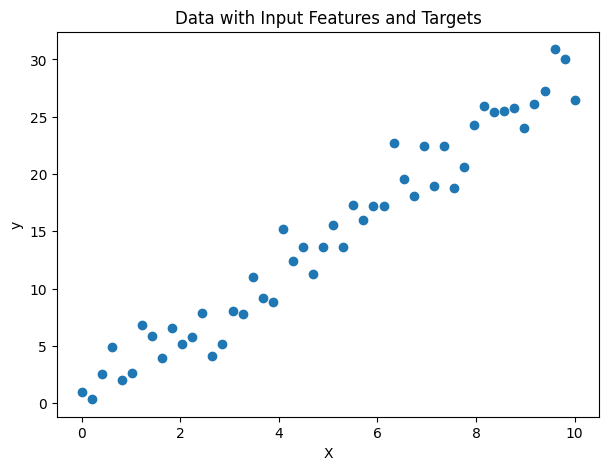

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Data with Input Features and Targets")
plt.show()


## Supervised Learning

In supervised learning, the model is trained using **input–output pairs**.
The presence of labels (`y`) explicitly guides the learning process.

Here, we use **linear regression** to learn the relationship between `X` and `y`.


In [5]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


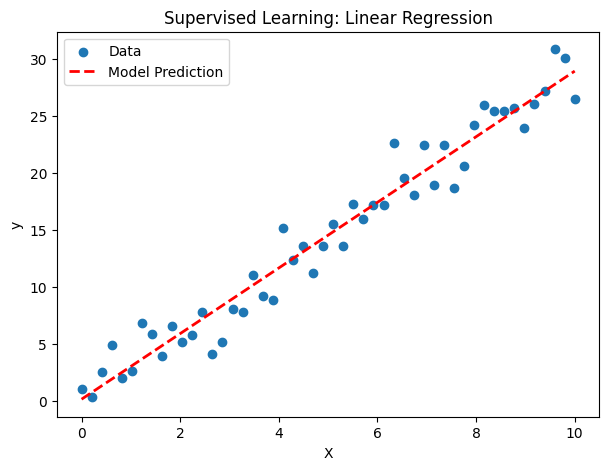

In [8]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Model Prediction", linewidth=2, linestyle="--")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Supervised Learning: Linear Regression")
plt.legend()
plt.show()


### Interpretation (Supervised Learning)

The regression line captures the overall trend between `X` and `y`, despite
the presence of noise.

This is possible because the model has access to target labels, allowing it
to directly learn a predictive mapping from inputs to outputs.


## Unsupervised Learning

In unsupervised learning, **no target labels are provided**.
The algorithm must discover structure using only the input features.

In this example, clustering is performed **only on `X`**.
The model has no access to the target variable `y`.


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)


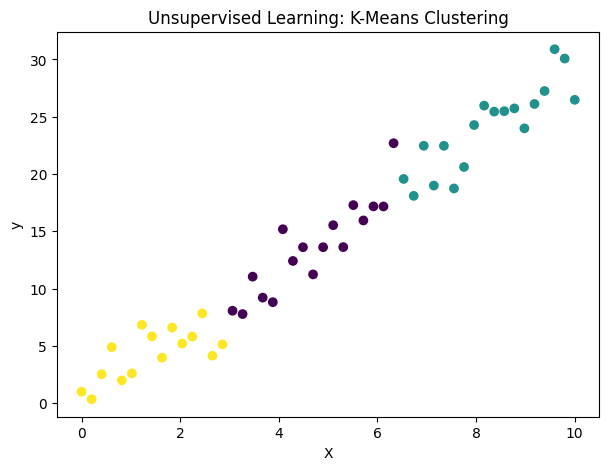

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c=clusters, cmap="viridis")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Unsupervised Learning: K-Means Clustering")
plt.show()


### Interpretation (Unsupervised Learning)

The clustering algorithm groups points based on similarity in the input space.
However, these clusters do not correspond to predicting `y`.

This highlights a key limitation of unsupervised learning:
without labels, the algorithm does not know which structure is useful
for a specific prediction task.


## Key Differences Observed

- Supervised learning uses labeled data to learn a direct mapping from inputs to outputs.
- Unsupervised learning identifies patterns without knowing the prediction task.
- Without labels, the algorithm cannot determine which structure is meaningful.

This demonstrates why labeled data enables prediction, while unlabeled data
is primarily used for exploration and pattern discovery.


### Try This

- Change the number of clusters in k-means
- Reduce or remove noise from the data
- Apply clustering to `y` instead of `X`

Observe how the behavior of unsupervised learning changes.


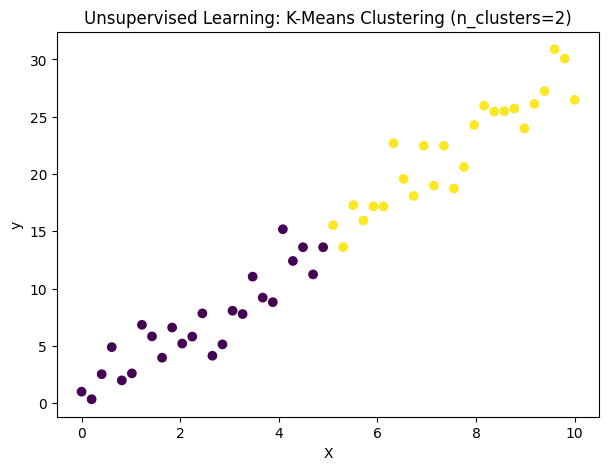

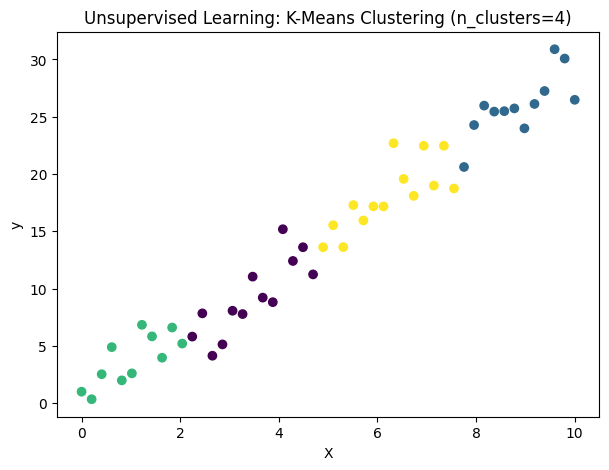

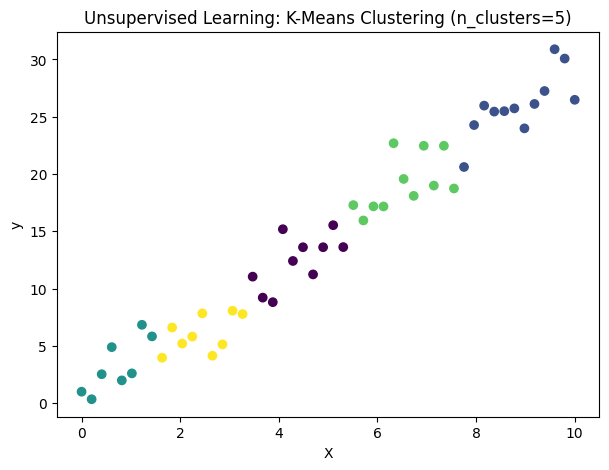

In [11]:
# let change the number of clusters

for n_clusters in [2, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X)

    plt.figure(figsize=(7, 5))
    plt.scatter(X, y, c=clusters, cmap="viridis")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Unsupervised Learning: K-Means Clustering (n_clusters={n_clusters})")
    plt.show()

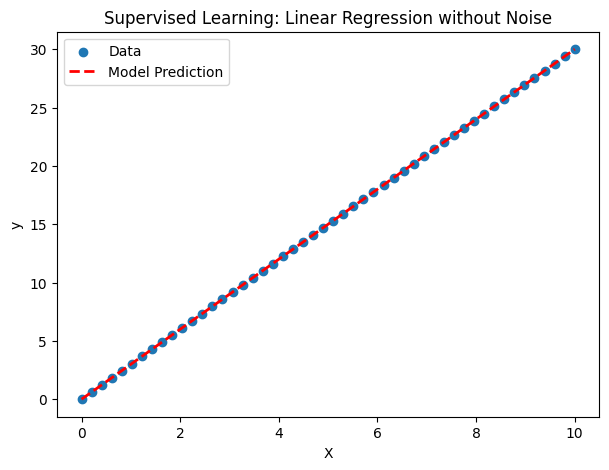

In [12]:
# Removing the noise from the data
y = 3 * X.squeeze()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(7, 5))
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Model Prediction", linewidth=2, linestyle="--")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Supervised Learning: Linear Regression without Noise")
plt.legend()
plt.show()

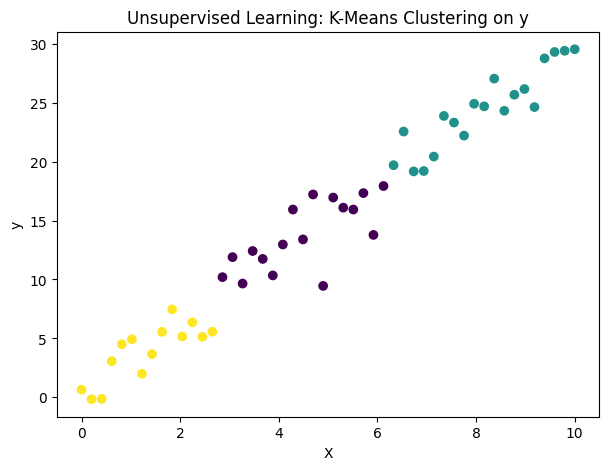

In [14]:
# Applying clustering on the y instead of X
y = 3 * X.squeeze() + np.random.randn(50) * 2
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(y.reshape(-1, 1))
plt.figure(figsize=(7, 5))
plt.scatter(X, y, c=clusters, cmap="viridis")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Unsupervised Learning: K-Means Clustering on y")
plt.show()